# Example CNN to build CIFAR10 model

https://www.kdnuggets.com/building-a-convolutional-neural-network-with-pytorch

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision

In [10]:
transform = torchvision.transforms.Compose(
    [torchvision.transforms.ToTensor()]
)

train = torchvision.datasets.CIFAR10(
    root="data", train=True, download=True, transform=transform
)

test = torchvision.datasets.CIFAR10(
    root="data", train=False, download=True, transform=transform
)

Files already downloaded and verified
Files already downloaded and verified


In [11]:
#After that, we will use a data loader and split the images into the batches. 
batch_size = 32
trainloader = torch.utils.data.DataLoader(
    train, batch_size=batch_size, shuffle=True
)
testloader = torch.utils.data.DataLoader(
    test, batch_size=batch_size, shuffle=True
)

visualise data

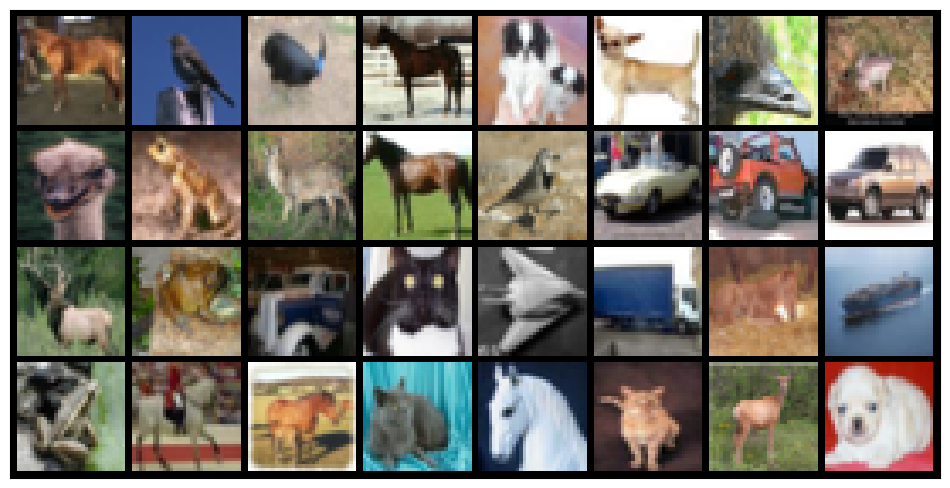

In [12]:
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 12))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images[:64], nrow=8).permute(1, 2, 0))
        break
show_batch(trainloader)

In [13]:
class CNNModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=(3,3), stride=1, padding=1)
        self.act1 = nn.ReLU()
        self.drop1 = nn.Dropout(0.3)
 
        self.conv2 = nn.Conv2d(32, 32, kernel_size=(3,3), stride=1, padding=1)
        self.act2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=(2, 2))
 
        self.flat = nn.Flatten()
 
        self.fc3 = nn.Linear(8192, 512)
        self.act3 = nn.ReLU()
        self.drop3 = nn.Dropout(0.5)
 
        self.fc4 = nn.Linear(512, 10)
 
    def forward(self, x):
        # input 3x32x32, output 32x32x32
        x = self.act1(self.conv1(x))
        x = self.drop1(x)
        # input 32x32x32, output 32x32x32
        x = self.act2(self.conv2(x))
        # input 32x32x32, output 32x16x16
        x = self.pool2(x)
        # input 32x16x16, output 8192
        x = self.flat(x)
        # input 8192, output 512
        x = self.act3(self.fc3(x))
        x = self.drop3(x)
        # input 512, output 10
        x = self.fc4(x)
        return x

Initialise mode, set loss function and optimizer

In [14]:
model = CNNModel()

if torch.cuda.is_available():
    device = torch.device("cuda")
    model.to(device)
    print("Model moved to GPU")
else:
    print("GPU is not available, using CPU instead")

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

Model moved to GPU


In the training phase, we will train our model for 10 epochs.

We are using the forward function of the model for a forward pass, then a backward pass using the loss function, and finally updating the weights. This step is almost similar in all kinds of neural network models. 
After that, we are using a test data loader to evaluate model performance at the end of each epoch. 
Calculating the accuracy of the model and printing the results. 

In [17]:
n_epochs = 10
for epoch in range(n_epochs):
    for i, (images, labels) in enumerate(trainloader):
        images, labels = images.to(device), labels.to(device)
        # Forward pass 
        outputs = model(images)
        loss = loss_fn(outputs, labels)

        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in testloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Epoch %d: Accuracy: %d %%' % (epoch,(100 * correct / total)))

Epoch 0: Accuracy: 35 %
Epoch 1: Accuracy: 41 %
Epoch 2: Accuracy: 45 %
Epoch 3: Accuracy: 47 %
Epoch 4: Accuracy: 50 %
Epoch 5: Accuracy: 51 %
Epoch 6: Accuracy: 54 %
Epoch 7: Accuracy: 54 %
Epoch 8: Accuracy: 56 %
Epoch 9: Accuracy: 57 %
